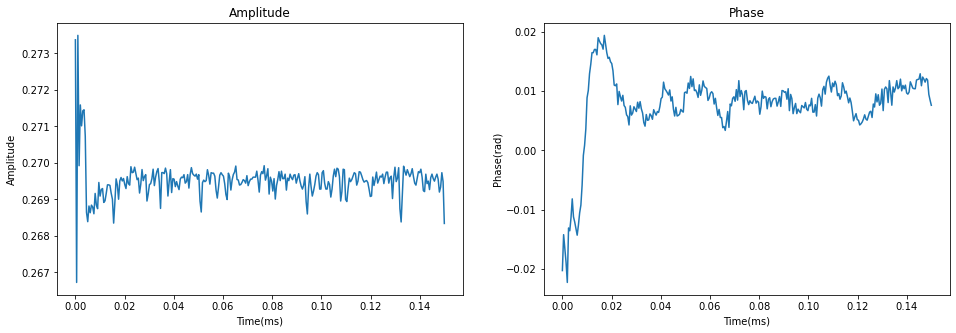

165238_10db.csv Rabi (dp, dv) =  (-1.834236928151074e-05, -0.00016508132353359667) Ramsey (dp, dv) =  (-0.00052289292259219, -0.00470603630332971) HRamsey (dp, dv) =  (-0.0008050296536099383, -0.007245266882489445)


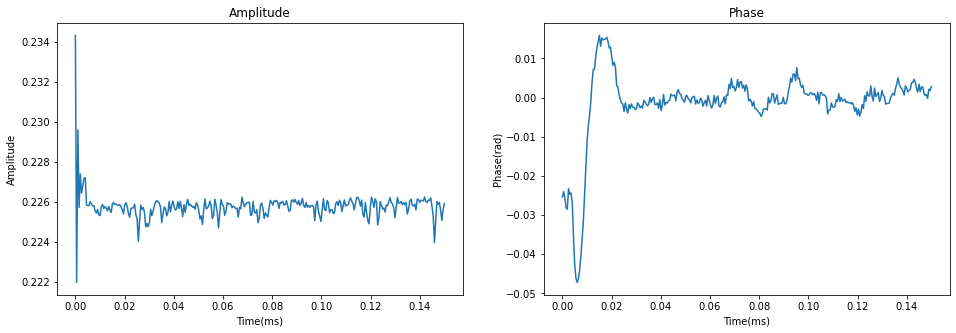

165502_9db.csv Rabi (dp, dv) =  (3.3826016754779856e-06, 3.044341507930187e-05) Ramsey (dp, dv) =  (0.00010754127366005032, 0.0009678714629404528) HRamsey (dp, dv) =  (0.00013996685164628897, 0.0012597016648166006)


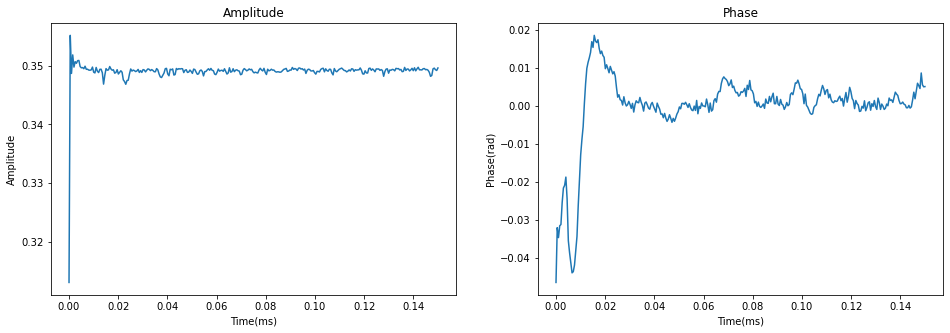

165734_8db.csv Rabi (dp, dv) =  (2.4579092573164827e-07, 2.2121183315848344e-06) Ramsey (dp, dv) =  (1.6606688717369664e-05, 0.00014946019845632697) HRamsey (dp, dv) =  (3.404318628851951e-06, 3.063886765966756e-05)


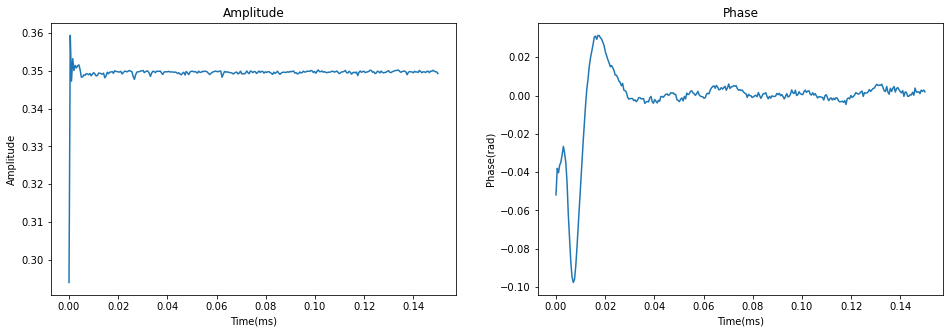

165913_7db.csv Rabi (dp, dv) =  (4.302520253741692e-06, 3.872268228367523e-05) Ramsey (dp, dv) =  (0.0001407484477868678, 0.0012667360300818104) HRamsey (dp, dv) =  (0.00017493222916913678, 0.001574390062522231)


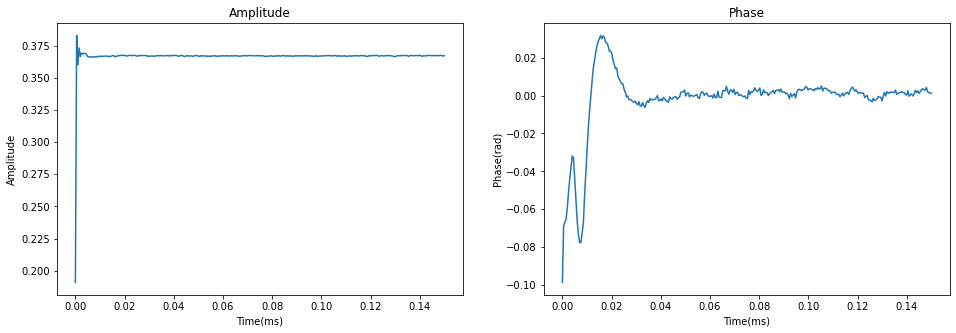

170042_6db.csv Rabi (dp, dv) =  (3.8008501323049567e-06, 3.420765119074461e-05) Ramsey (dp, dv) =  (0.00012622171849283994, 0.0011359954664355596) HRamsey (dp, dv) =  (0.00015307468902323485, 0.0013776722012091135)


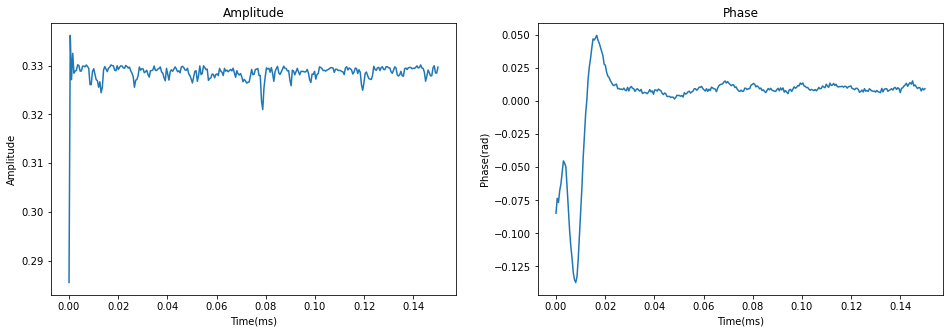

170206_5db.csv Rabi (dp, dv) =  (-7.614003037819421e-06, -6.852602734037478e-05) Ramsey (dp, dv) =  (-0.00018552053874588422, -0.001669684848712958) HRamsey (dp, dv) =  (-0.000358386128938147, -0.003225475160443323)


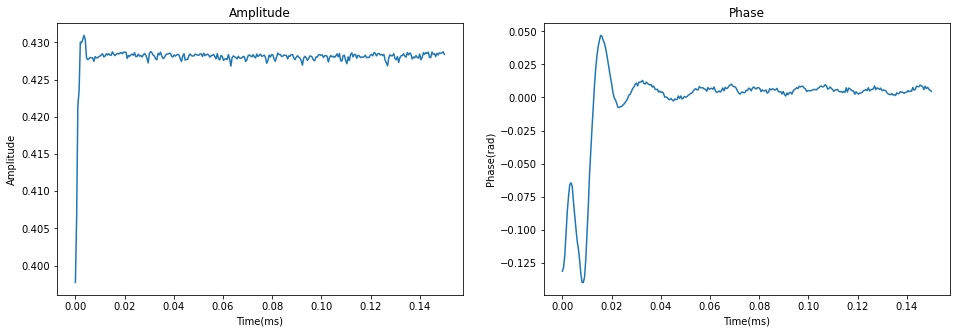

170337_4db.csv Rabi (dp, dv) =  (4.959052507620951e-06, 4.4631472568588557e-05) Ramsey (dp, dv) =  (0.00018382839015251785, 0.0016544555113726608) HRamsey (dp, dv) =  (0.0001850635241135379, 0.001665571717021841)


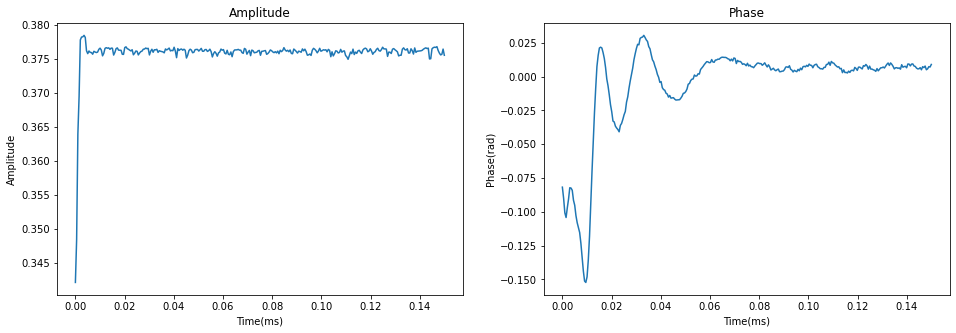

170503_3db.csv Rabi (dp, dv) =  (1.2555119294151056e-05, 0.0001129960736473595) Ramsey (dp, dv) =  (0.00042246561351586774, 0.0038021905216428097) HRamsey (dp, dv) =  (0.0005017462709924903, 0.004515716438932413)


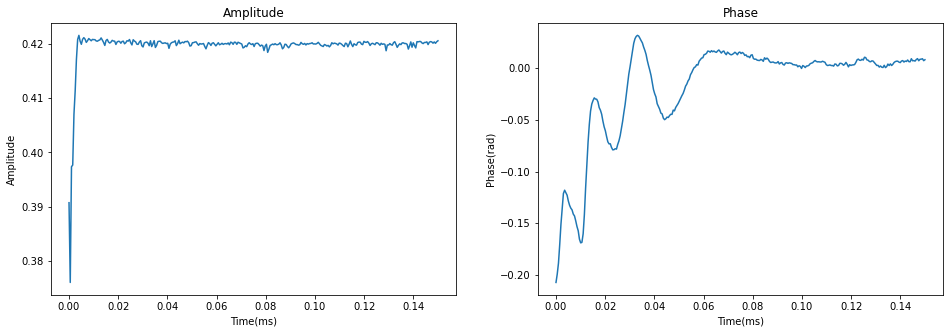

170615_2db.csv Rabi (dp, dv) =  (3.8728342620677854e-05, 0.0003485550835861007) Ramsey (dp, dv) =  (0.0012194113516555798, 0.010974702164900218) HRamsey (dp, dv) =  (0.0016119780414996345, 0.01450780237349671)


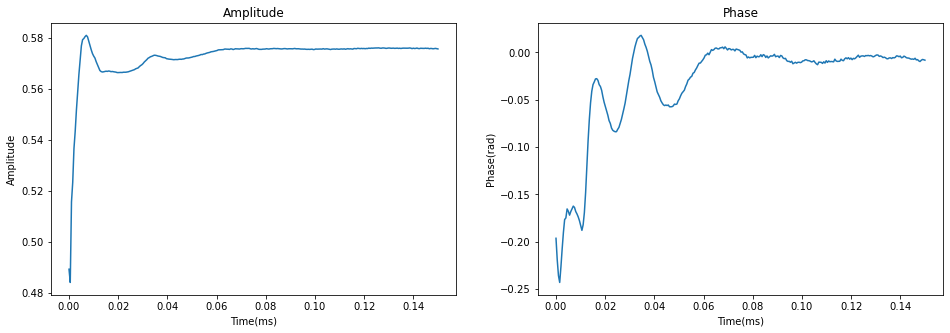

170724_1db.csv Rabi (dp, dv) =  (7.08975988456784e-05, 0.0006380783896111057) Ramsey (dp, dv) =  (0.0021558899640313624, 0.01940300967628226) HRamsey (dp, dv) =  (0.003009047731280245, 0.027081429581522206)


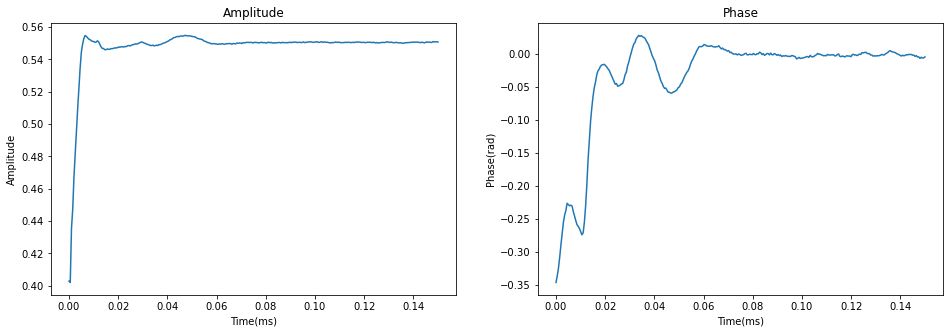

170838_0db.csv Rabi (dp, dv) =  (7.040846602518861e-05, 0.0006336761942266975) Ramsey (dp, dv) =  (0.0021726073995909662, 0.019553466596318694) HRamsey (dp, dv) =  (0.002963843852579836, 0.026674594673218525)


In [30]:
import pandas as pd
import csv
import glob, os
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, sqrt, arctan
import numpy as np

filenames=glob.glob(r'C:\Users\Cheng Wen\Desktop\Year 4 Sem 2\FYP\Data\single_shot_data_3\0\*.csv')

#Read csv file and translate timestamp into time(us)
"""input: full path of filename & threshold value, outputs: dataframe"""
def prep_f(fn):
    df = pd.read_csv(fn,header=None,names=['timestamp','amplitude','phase/rad'])
    frame_size, T = list(df.iloc[0])[:2]
    frame_size = int(frame_size.split(' ')[-1])
    T = float(T.split(' ')[-1])
    #immediately there is a problem: timestamp only has 0.1ms resolution - breaks when samples are 50us apart
    df = df.iloc[3:]
    df['t/us'] = np.linspace(0,T,frame_size)
    df = df.set_index('t/us').iloc[:-1]
    df = df.dropna(axis = 0, how = 'any') #drop nan row
    df = df.drop('timestamp',axis='columns') #redundant col
    df = df.applymap(lambda x: float(x)) #convert str to float
    #only consider values above certain threshold
    df = df[df['amplitude']>0.5*np.array(df['amplitude'])[-1]]
    return df

#Define Rabi sensitivity function
T = 1    #normalised units
d = 0.399343/T
pt = np.linspace(0, 1, 80000)
o = (pi/2) - arctan(2*T*d)
o3 = (pi*sqrt(1+(2*T*d)**2))*(pt/T)
o4 = (pi*sqrt(1+(2*T*d)**2))*((T-pt)/T)
g = (sin(o))**2 * cos(o) * ((1 - cos(o4))*sin(o3) + (1 - cos(o3))*sin(o4))
I = np.trapz(g, x=pt, axis = 0)

#Define differentiated Rabi sensitivity function
def sens(data):
    data['phase/rad']= np.unwrap(data['phase/rad'])
    data['phase/rad'] = data['phase/rad'] - np.mean(np.array(data['phase/rad'][-20000:]))
    data = data.iloc[:300]
    df = data['phase/rad']
    t = np.linspace(0, ((len(df)/2e6)/80e-3), len(data))
    #Rabi sensitivity function
    o1 = (pi*sqrt(1+(2*T*d)**2))*(t/T)
    o2 = (pi*sqrt(1+(2*T*d)**2))*((T-t)/T)
    dg = ((2*pi*d)/(1+(2*T*d)**2)) * ((1 - cos(o2))*cos(o1) - (1 - cos(o1))*cos(o2))
    dp = -0.5*np.trapz(dg*df, x=t, axis = 0) #change in excitation probability
    dv = dp*9 #change in frequency
    #Plot graphs
    fig, [ax0,ax1] = plt.subplots(1,2,figsize=(16,5))
    ax0.title.set_text('Amplitude')
    ax1.title.set_text('Phase')
    ax0.set(xlabel="Time(ms)",ylabel="Amplitude")
    ax1.set(xlabel="Time(ms)",ylabel="Phase(rad)")
    ax0.plot(t*80,data['amplitude'])
    ax1.plot(t*80,data['phase/rad'])
    plt.show()
    return dp, dv

def ram(data):
    data['phase/rad']= np.unwrap(data['phase/rad'])
    data['phase/rad'] = data['phase/rad'] - np.mean(np.array(data['phase/rad'][-20000:]))
    data = data.iloc[:300]
    df = data['phase/rad']
    t = np.linspace(0, ((len(df)/2e6)/80e-3), len(data))
    #Ramsey senstivity function
    ti = 20e-3
    td = 40e-3
    g1 = sin((pi/2)*(t/ti))
    dg1 = (pi/(2*ti))*cos((pi/2)*(t/ti))
    g2 = 1
    dg2 = 0
    g3 = sin((pi/2)*(t-ti-td)/ti)
    dg3 = (pi/(2*ti))*cos((pi/2)*(t-ti-td)/ti)
    I2 = td - (4/pi)*ti
    dp2 = -0.5*np.trapz((dg1+dg3)*df, x=t, axis = 0) #change in excitation probability
    dv2 = dp2*9 #change in frequency
    return dp2, dv2

def hram(data):
    data['phase/rad']= np.unwrap(data['phase/rad'])
    data['phase/rad'] = data['phase/rad'] - np.mean(np.array(data['phase/rad'][-20000:]))
    data = data.iloc[:300]
    df = data['phase/rad']
    t = np.linspace(0, ((len(df)/2e6)/120e-3), len(data))
    #Hyper Ramsey senstivity function
    ti = 20e-3
    td = 80e-3
    g1 = sin((pi/2)*(t/ti))
    dg1 = (pi/(2*ti))*cos((pi/2)*(t/ti))
    g2 = 1
    dg2 = 0
    g3 = sin((pi/2)*(t-ti-td)/ti)
    dg3 = (pi/(2*ti))*cos((pi/2)*(t-ti-td)/ti)
    g4 = -sin((pi/2)*(t-2*ti-td)/ti)
    dg4 = -(pi/(2*ti))*cos((pi/2)*(t-2*ti-td)/ti)
    g5 = -sin((pi/2)*(t-3*ti-td)/ti)
    dg5 = -(pi/(2*ti))*cos((pi/2)*(t-3*ti-td)/ti)
    I2 = td - (4/pi)*ti
    dp3 = -0.5*np.trapz((dg1+dg3+dg4+dg5)*df, x=t, axis = 0) #change in excitation probability
    dv3 = dp3*9 #change in frequency
    return dp3, dv3

for i in filenames:
    sep = "_"
    print(os.path.basename(i).split(sep, 1)[1], "Rabi (dp, dv) = ", sens(prep_f(i)), "Ramsey (dp, dv) = ", ram(prep_f(i)), "HRamsey (dp, dv) = ", hram(prep_f(i)))

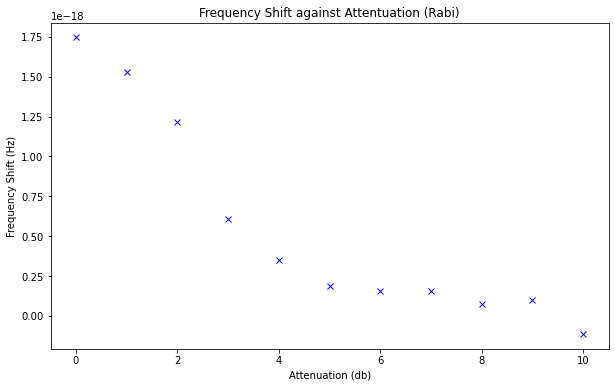

In [26]:
def freq(data):
    data['phase/rad']= np.unwrap(data['phase/rad'])
    data['phase/rad'] = data['phase/rad'] - np.mean(np.array(data['phase/rad'][-20000:]))
    data = data.iloc[:100]
    df = data['phase/rad']
    t = np.linspace(0, ((len(df)/2e6)/80e-3), len(data))
    o1 = (pi*sqrt(1+(2*T*d)**2))*(t/T)
    o2 = (pi*sqrt(1+(2*T*d)**2))*((T-t)/T)
    dg = ((2*pi*d)/(1+(2*T*d)**2)) * ((1 - cos(o2))*cos(o1) - (1 - cos(o1))*cos(o2))
    dp = -0.5*np.trapz(dg*df, x=t, axis = 0) #change in excitation probability
    dv = (dp*9)/(353*10**12) #change in frequency
    return dv

#Plot frequency shift against attenuation
attn = list(reversed(range(11)))
v = []
for i in filenames:
    #sep = '_'
    #attn.append(os.path.basename(i).split(sep, 1)[0])
    v.append(freq(prep_f(i)))
    
fig=plt.figure(figsize=(10,6))
plt.plot(attn, v, "bx")
plt.title("Frequency Shift against Attentuation (Rabi)")
plt.xlabel('Attenuation (db)')
plt.ylabel('Frequency Shift (Hz)')
plt.show()

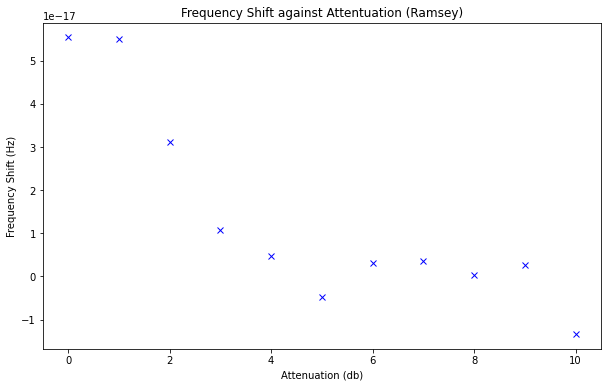

In [27]:
def freq2(data):
    data['phase/rad']= np.unwrap(data['phase/rad'])
    data['phase/rad'] = data['phase/rad'] - np.mean(np.array(data['phase/rad'][-20000:]))
    data = data.iloc[:300]
    df = data['phase/rad']
    t = np.linspace(0, ((len(df)/2e6)/80e-3), len(data))
    #Ramsey senstivity function
    ti = 20e-3
    td = 40e-3
    g1 = sin((pi/2)*(t/ti))
    dg1 = (pi/(2*ti))*cos((pi/2)*(t/ti))
    g2 = 1
    dg2 = 0
    g3 = sin((pi/2)*(t-ti-td)/ti)
    dg3 = (pi/(2*ti))*cos((pi/2)*(t-ti-td)/ti)
    dp2 = -0.5*np.trapz((dg1+dg3)*df, x=t, axis = 0) #change in excitation probability
    dv2 = (dp2*9)/(353*10**12) #change in frequency
    return dv2

#Plot frequency shift against attenuation
attn2 = list(reversed(range(11)))
v2 = []
for i in filenames:
    #sep = '_'
    #attn.append(os.path.basename(i).split(sep, 1)[0])
    v2.append(freq2(prep_f(i)))
    
fig=plt.figure(figsize=(10,6))
plt.plot(attn2, v2, "bx")
plt.title("Frequency Shift against Attentuation (Ramsey)")
plt.xlabel('Attenuation (db)')
plt.ylabel('Frequency Shift (Hz)')
plt.show()

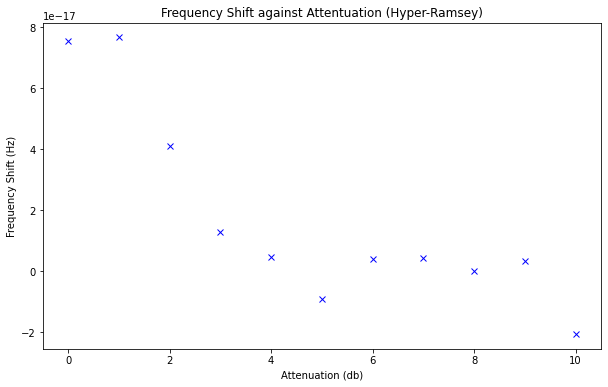

In [29]:
def freq3(data):
    data['phase/rad']= np.unwrap(data['phase/rad'])
    data['phase/rad'] = data['phase/rad'] - np.mean(np.array(data['phase/rad'][-20000:]))
    data = data.iloc[:300]
    df = data['phase/rad']
    t = np.linspace(0, ((len(df)/2e6)/120e-3), len(data))
    #Hyper-Ramsey senstivity function
    ti = 20e-3
    td = 80e-3
    g1 = sin((pi/2)*(t/ti))
    dg1 = (pi/(2*ti))*cos((pi/2)*(t/ti))
    g2 = 1
    dg2 = 0
    g3 = sin((pi/2)*(t-ti-td)/ti)
    dg3 = (pi/(2*ti))*cos((pi/2)*(t-ti-td)/ti)
    g4 = -sin((pi/2)*(t-2*ti-td)/ti)
    dg4 = -(pi/(2*ti))*cos((pi/2)*(t-2*ti-td)/ti)
    g5 = -sin((pi/2)*(t-3*ti-td)/ti)
    dg5 = -(pi/(2*ti))*cos((pi/2)*(t-3*ti-td)/ti)
    dp3 = -0.5*np.trapz((dg1+dg3+dg4+dg5)*df, x=t, axis = 0) #change in excitation probability
    dv3 = (dp3*9)/(353*10**12) #change in frequency
    return dv3

#Plot frequency shift against attenuation
attn3 = list(reversed(range(11)))
v3 = []
for i in filenames:
    #sep = '_'
    #attn.append(os.path.basename(i).split(sep, 1)[0])
    v3.append(freq3(prep_f(i)))
    
fig=plt.figure(figsize=(10,6))
plt.plot(attn3, v3, "bx")
plt.title("Frequency Shift against Attentuation (Hyper-Ramsey)")
plt.xlabel('Attenuation (db)')
plt.ylabel('Frequency Shift (Hz)')
plt.show()